In [64]:
indi = ['','ROE']

In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

kospi = pd.read_csv("./kospi(18~22).csv")
# kospi['PLUS'] = kospi['PBR']+kospi['EY']
# kospi = kospi[['회사명', '회계년도', 'PBR','NEW','ROE', '수익률']]
kospi = kospi.replace([np.inf, -np.inf], 0)
# kospi['판관비'] = -1*kospi['판관비']
kospi

,회사명,종목코드,회계년도,종가,ROE,시가총액,PER,PBR,PCR,PSR,PRR,RDS,RDO,RDN,ROA,판관비,EY,수정종가,수익률
0,DB하이텍,990,2018,10850.0,1.051202,4.817247e+11,-0.420016,-0.102793,-0.330934,-0.332123,-0.187528,3.129084,0.452043,0.267248,0.915791,-0.359154,1.593415,14150.0,-3.046683
1,DB하이텍,990,2019,27600.0,1.084892,1.225401e+12,-0.420889,-0.059488,-0.308201,-0.325966,-0.185292,2.655557,0.191781,0.205179,1.269900,-0.598965,0.785723,13000.0,-0.812721
2,DB하이텍,990,2020,51000.0,1.767110,2.264328e+12,-0.399472,0.296942,-0.316410,-0.254813,-0.182456,2.384364,0.094742,0.068176,2.349707,-0.677220,0.383688,20900.0,6.076923
3,DB하이텍,990,2021,72700.0,3.004007,3.227777e+12,-0.399414,0.766631,-0.281540,-0.152189,-0.180473,1.946054,-0.039200,-0.048378,3.883192,-0.698407,0.605251,57700.0,17.607656
4,DB하이텍,990,2022,37150.0,3.891974,1.649408e+12,-0.448185,0.130386,-0.332056,-0.254129,-0.185392,1.617175,-0.137729,-0.099635,4.275733,-0.583749,4.321560,73400.0,2.720971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,효성티앤씨,298020,2022,350000.0,-0.902806,1.514689e+12,-0.428455,0.600075,-0.274805,-0.424485,-0.176832,-0.348097,-0.022350,0.653470,-0.940520,-0.376577,0.121049,462500.0,-1.711470
2516,효성화학,298000,2020,156500.0,-1.334757,4.992547e+11,-0.406980,-0.489204,-0.361173,-0.442958,-0.184854,0.048722,0.234392,-1.559665,-1.163508,-0.414788,0.765262,87100.0,-4.034247
2517,효성화학,298000,2021,303500.0,0.865908,9.682032e+11,-0.413731,0.130386,-0.335003,-0.406697,-0.181470,-0.052962,-0.062123,0.034656,-0.491967,-0.575194,1.001355,298000.0,24.213548
2518,흥아해운,3280,2021,2700.0,3.985824,6.491472e+11,0.005774,3.248322,-0.383625,0.683859,-0.189092,-0.456484,-0.297140,-0.206105,0.555293,-0.759238,-0.926847,1555.0,0.000000


In [66]:
X = kospi[['ROE', 'ROA', '판관비']]
y = kospi['수익률']
# Lasso 회귀분석 계수 저장을 위한 빈 리스트
lasso_coef_list = []

# 패러미터의 범위 설정
alpha_arr = np.linspace(0.000, 1.5, 100)

# 패러미터 변화에 따른 Lasso 회귀분석
for alpha in alpha_arr:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    lasso_coef_list.append(lasso.coef_)

/var/folders/3q/_hd1yc9n1bb97ktwdsjxvf640000gn/T/ipykernel_31775/1643617962.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X, y)
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.608e+04, tolerance: 1.381e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


/Users/kim/Library/Python/3.10/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  func(*args, **kwargs)
/Users/kim/Library/Python/3.10/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  func(*args, **kwargs)
/Users/kim/Library/Python/3.10/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/Users/kim/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kim/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kim/Library/Python/3.

               ROE       ROA       판관비
0.000000  1.640144 -0.381683 -0.617567
0.015152  1.534450 -0.271229 -0.593310
0.030303  1.429197 -0.161154 -0.569072
0.045455  1.323950 -0.051085 -0.544835
0.060606  1.268088 -0.000000 -0.526489
...            ...       ...       ...
1.439394  0.000000  0.000000 -0.000000
1.454545  0.000000  0.000000 -0.000000
1.469697  0.000000  0.000000 -0.000000
1.484848  0.000000  0.000000 -0.000000
1.500000  0.000000  0.000000 -0.000000

[100 rows x 3 columns]


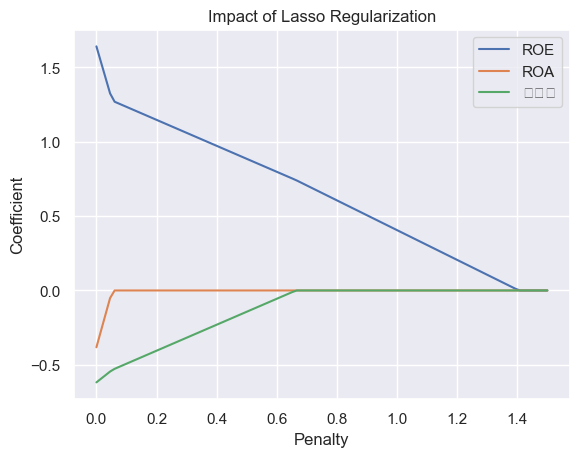

In [67]:
# 회귀분석 계수 데이터프레임
lasso_df = pd.DataFrame(lasso_coef_list, index=alpha_arr, columns=['ROE', 'ROA', '판관비'])

# 분석 결과 시각화
lasso_df.plot()
plt.title('Impact of Lasso Regularization')
plt.xlabel('Penalty')
plt.ylabel('Coefficient')
print(lasso_df)